In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating word clouds
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords

# Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import stats

# Predicting the genre
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Loading the data
df = pd.read_csv('lyrics.csv', index_col=0)
print("Number of songs before cleaning:", len(df))

data = df.dropna()
data = data.drop(data[data.genre == 'Not Available'].index)
data = data.drop(data[data.genre == 'Other'].index)
print("Number of songs after cleaning:", len(data))

Number of songs before cleaning: 362237
Number of songs after cleaning: 237426


genre
Rock          109235
Pop            40466
Hip-Hop        24850
Metal          23759
Country        14387
Jazz            7970
Electronic      7966
R&B             3401
Indie           3149
Folk            2243
dtype: int32


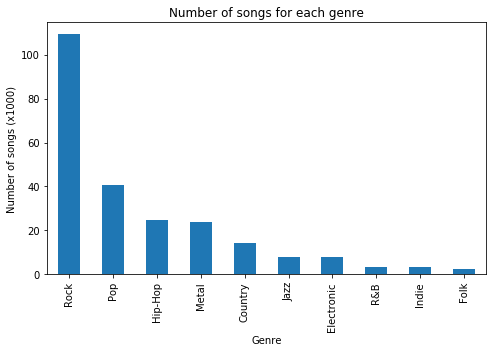

In [3]:
# Create a plot of the counts per genre
counts = data.groupby('genre').size().sort_values(ascending=False)/1000
print((counts*1000).astype(int))

ax = counts.plot.bar(title="Number of songs for each genre", figsize=(7,5))
ax.set_xlabel('Genre')
ax.set_ylabel('Number of songs (x1000)')

plt.tight_layout()
#plt.savefig('barplot.pdf')

# Difference in the use of words

In [4]:
# Split the four main genres
# Subset Hip-Hop
lyrics_HipHop = data[data.genre =='Hip-Hop']
# Subset Metal
lyrics_Metal = data[data.genre =='Metal']
# Subset Pop
lyrics_Pop = data[data.genre =='Pop']
# Subset Rock
lyrics_Rock = data[data.genre =='Rock']

In [5]:
# Convert lyrics to text
HipHop_text = " ".join(lyrics for lyrics in lyrics_HipHop.lyrics)
Metal_text = " ".join(lyrics for lyrics in lyrics_Metal.lyrics)
Pop_text = " ".join(lyrics for lyrics in lyrics_Pop.lyrics)
Rock_text = " ".join(lyrics for lyrics in lyrics_Rock.lyrics)

In [6]:
# Get stop words list
set_english_stopwords = set(stopwords.words('english'))
stopwords = set_english_stopwords

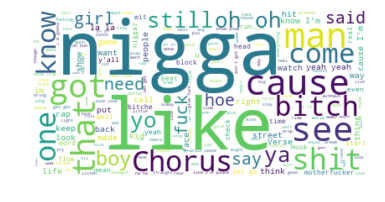

In [7]:
# Generate a word cloud image of Hip-Hop
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(HipHop_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

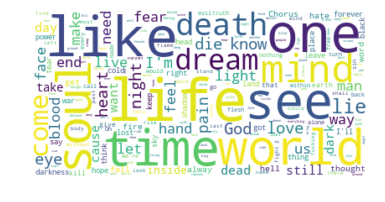

In [8]:
# Generate a word cloud image of Metal
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Metal_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

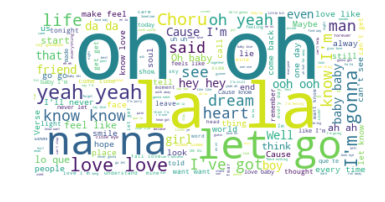

In [9]:
# Generate a word cloud image of Pop
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Pop_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# In Pop songs a lot of words like 'la', 'na' and 'oh' are being used.

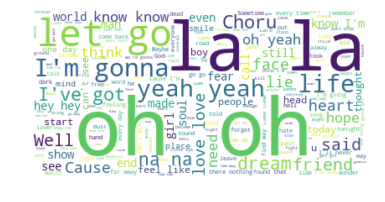

In [10]:
# Generate a word cloud image of Rock
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Rock_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Also in Rock songs, there are a lot of words like 'oh' and 'la'.

In [11]:
# Update stop words list
stopwords.update(["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"])
stopwords.update(["hey", "oh", "la", "na", "flavors", "yeah", "choru", "chorus", "ooh", "da"])

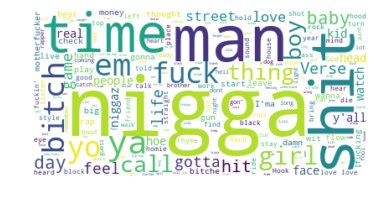

In [12]:
# Generate a second word cloud image of Hip-Hop
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(HipHop_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("img/HipHop.png")

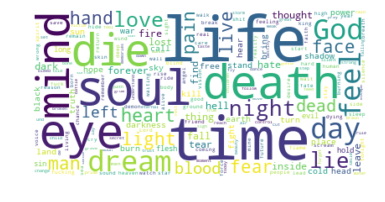

In [13]:
# Generate a second word cloud image of Metal
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Metal_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("img/Metal.png")

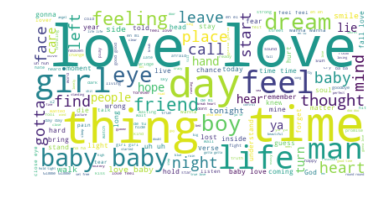

In [14]:
# Generate a second word cloud image of Pop
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Pop_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("img/Pop.png")

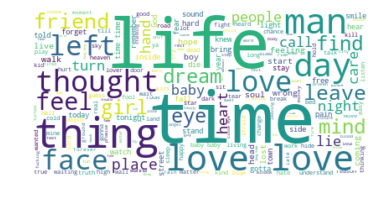

In [15]:
# Generate a second word cloud image of Rock
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Rock_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("img/Rock.png")

# Sentiment analysis

In [16]:
# Create the model for sentiment analysis
vader_model = SentimentIntensityAnalyzer()

In [17]:
score_HipHop = [vader_model.polarity_scores(songtext)['compound'] for songtext in lyrics_HipHop['lyrics']]
score_Metal = [vader_model.polarity_scores(songtext)['compound'] for songtext in lyrics_Metal['lyrics']]
score_Pop = [vader_model.polarity_scores(songtext)['compound'] for songtext in lyrics_Pop['lyrics']]
score_Rock = [vader_model.polarity_scores(songtext)['compound'] for songtext in lyrics_Rock['lyrics']]

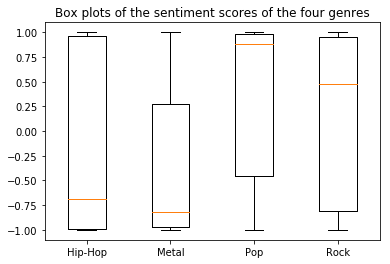

In [18]:
# Create box plots of the compound scores
boxplots = [score_HipHop, score_Metal, score_Pop, score_Rock]
fig7, ax7 = plt.subplots()
ax7.set_title('Box plots of the sentiment scores of the four genres')
ax7.boxplot(boxplots)
plt.xticks([1, 2, 3, 4], ['Hip-Hop', 'Metal', 'Pop', 'Rock'])

plt.show()
#plt.savefig('boxplot.pdf')
# The box plots suggest that Pop has a relatively positive sentiment and Metal has a more negative sentiment.

In [19]:
# Check if the variances do not differ too much
print("Variance Hip-Hop:", round(np.var(score_HipHop), 4))
print("Variance Metal:  ", round(np.var(score_Metal), 4))
print("Variance Pop:    ", round(np.var(score_Pop), 4))
print("Variance Rock:   ", round(np.var(score_Rock), 4))

Variance Hip-Hop: 0.8146
Variance Metal:   0.5566
Variance Pop:     0.6106
Variance Rock:    0.6568


In [20]:
# t-tests to check whether there is a significant difference in sentiment between genres
print('H0: Pop > Rock:     ', stats.ttest_ind(score_Pop, score_Rock))
#p/2 is smaller than so reject H0 and accept H1 which says: mean(Pop) > mean(Rock)

print('H0: Rock > Hip-Hop: ', stats.ttest_ind(score_Rock, score_HipHop))
#p/2 is smaller than so reject H0 and accept H1 which says: mean(Rock) > mean(Hip-Hop)

print('H0: Hip-Hop > Metal:', stats.ttest_ind(score_HipHop, score_Metal))
#p/2 is smaller than so reject H0 and accept H1 which says: mean(Hip-Hop) > mean(Metal)

# Therefore the sentiment scores can be ordered as follows:
# Pop > Rock > Hip-Hop > Metal

H0: Pop > Rock:      Ttest_indResult(statistic=45.57200851463212, pvalue=0.0)
H0: Rock > Hip-Hop:  Ttest_indResult(statistic=47.1700316676966, pvalue=0.0)
H0: Hip-Hop > Metal: Ttest_indResult(statistic=31.643989473508764, pvalue=1.5010149121850088e-217)


# Predicting the genre of a song

In [21]:
# Create Naive Bayes model for the full dataset
X_train, X_test, y_train, y_test = train_test_split(data.lyrics, data.genre, test_size=0.2, random_state=109)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

labels = model.predict(X_test)

In [22]:
# Print accuracy and classification report
print("Accuracy:", round(metrics.accuracy_score(y_test, labels), 4))
print(classification_report(y_test, labels))

Accuracy: 0.5052


C:\Users\Hp\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00      2870
  Electronic       1.00      0.00      0.00      1611
        Folk       0.91      0.04      0.08       468
     Hip-Hop       0.92      0.33      0.48      5002
       Indie       0.00      0.00      0.00       643
        Jazz       0.00      0.00      0.00      1580
       Metal       0.90      0.05      0.10      4761
         Pop       0.42      0.13      0.19      7952
         R&B       0.00      0.00      0.00       674
        Rock       0.49      0.96      0.65     21925

   micro avg       0.51      0.51      0.51     47486
   macro avg       0.46      0.15      0.15     47486
weighted avg       0.53      0.51      0.39     47486



In [23]:
# Confusion matrix
cm = confusion_matrix(y_test, labels)

In [ ]:
#            Coun , Elec , Folk , Hip-H, Indie, Jazz , Metal, Pop  , R&B  , Rock
#Country    [    0,     0,     0,     1,     0,     0,     0,     8,     0,  2861]
#Electronic [    0,     3,     0,    20,     0,     0,     3,    55,     0,  1530]
#Folk       [    0,     0,    20,     0,     0,     0,     0,    44,     0,   404]
#Hip-Hop    [    0,     0,     0,  1646,     0,     0,     1,   208,     0,  3147]
#Indie      [    0,     0,     0,     2,     0,     0,     0,    28,     0,   613]
#Jazz       [    0,     0,     0,     4,     0,     0,     0,    89,     0,  1487]
#Metal      [    0,     0,     0,    31,     0,     0,   259,   124,     0,  4347]
#Pop        [    0,     0,     0,    46,     0,     0,     8,  1006,     0,  6892]
#R&B        [    0,     0,     0,     4,     0,     0,     0,     5,     0,   665]
#Rock       [    0,     0,     2,    37,     0,     0,    16,   816,     0, 21054]

In [24]:
# Split data in only the four main genres
data1 = data[(data.genre == "Hip-Hop") | (data.genre == "Metal") | (data.genre == "Pop") | (data.genre == "Rock")]

data1.groupby('genre').size()

genre
Hip-Hop     24850
Metal       23759
Pop         40466
Rock       109235
dtype: int64

In [25]:
# Create Naive Bayes model for the new dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1.lyrics, data1.genre, test_size=0.2, random_state=109)

model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1.fit(X_train1, y_train1)

labels1 = model1.predict(X_test1)

In [26]:
# Print accuracy and classification report of the second model
print("Accuracy:", round(metrics.accuracy_score(y_test1, labels1),4))
print(classification_report(y_test1, labels1))

Accuracy: 0.604
              precision    recall  f1-score   support

     Hip-Hop       0.94      0.34      0.50      4909
       Metal       0.90      0.06      0.11      4747
         Pop       0.48      0.13      0.20      8179
        Rock       0.59      0.96      0.73     21827

   micro avg       0.60      0.60      0.60     39662
   macro avg       0.73      0.37      0.39     39662
weighted avg       0.65      0.60      0.52     39662



In [27]:
# Confusion matrix of the second model
cm1 = confusion_matrix(y_test1, labels1)
cm1

array([[ 1661,     0,   227,  3021],
       [   26,   287,   114,  4320],
       [   47,     7,  1025,  7100],
       [   33,    24,   788, 20982]], dtype=int64)